# Paired t-test   
by Tonatiuh Rangel


## Contents:    
1. [Theory](#theory)   
2. [Numerical example](#example)
3. [Scipy's example](#scipy)

<a id='theory'></a>

>Paired t-test is a statistical procedure used to determine whether the mean difference between two sets of observations is zero. In a paired sample t-test, each subject or entity is measured twice, resulting in pairs of observations. Source: [statisticssolutions](http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/)

Paired t-test, also called dependent t-test, is used to 
* Determine if a given medicine has an effect on patients, in which samples are collected before and after medication for the same people, and we can evaluate the statistical difference between samples    


### Assumptions:
1. The dependent variable must be continuous (interval/ratio)  
2. The observations are independent of one another.   
3. The dependent variable should be normally or approximately normally distributed.   
4. The dependent variable should not contain outliers.   

### Hypothesis
|Set|	Null hypothesis	| Alternative hypothesis |No. of tails |
|---|:-----------------:|:----------------------:|:-----------:|
|1	| $\mu_1 - \mu_2 = 0$ | $\mu_1 - \mu_2 \neq 0$ |	2|
|2	| $\mu_1 - \mu_2 > 0$ | $\mu_1 - \mu_2 < 0$ | 1|
|3	| $\mu_1 - \mu_2 < 0$ | $\mu_1 - \mu_2 > 0$ | 1|


### Test method

We will use the ** paired t-test ** method.   

#### Steps:   

We will use the following nomenclature:   

$D =$   differences between two paired samples   
$d_i =$ $i^{\textrm{th}}$ observation in $D$     
$n =$   sample size    
$\overline{d} =$ sample mean of the differences    
$s_d =$ sample standard deviation of the differences   


#### Standard error (SE):   
SE$ =  \frac{\displaystyle s_d}{ \sqrt{n}} $


#### Degrees of freedom (DF):   
DF $ = n-1$


#### Test statistic:   
$t = \frac{\displaystyle \overline{d} }{\displaystyle \textrm{SE}}$




<a id='example'></a>
## Numerical example    
In this test, let's use a hypothethical example of blood glucose (BG) readings of persons with diabetes.    
The test is done twice, say before and after a given clinical treatment and we want to know if there is a significant difference after the treatment.     

The database is not real but just to be used as a toy example.   
This contains BG readings (in mg/dL) for 40 persons with diabetes at different times.

In [1]:
import pandas as pd
import numpy as np
# This is to print in markdown style
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Read dataset locally:
#df = pd.read_csv('../data/BG-db.csv',index_col=0)


# Read dataset from url:
import io
import requests
url="https://raw.githubusercontent.com/trangel/stats-with-python/master/data/BG-db.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),index_col=0)


del df['BG 3']
df.head()

,BG 1,BG 2
Person ID,,
0,89.162573,94.023517
1,90.857629,95.273755
2,94.912999,96.612870
3,95.254064,96.818673
4,97.136291,97.760342


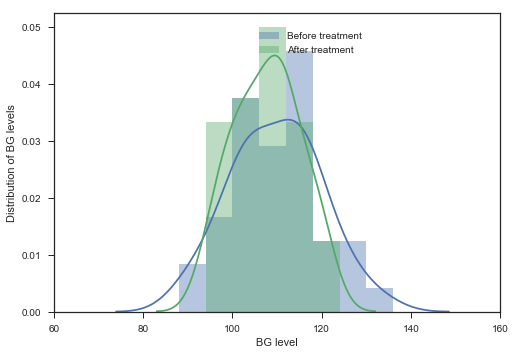

In [2]:
# Let's visualize the data
import matplotlib as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")


bins = np.arange(70,150,6)

A = df['BG 1'].values
B = df['BG 2'].values

# Show the results of a linear regression within each dataset
ax1 = sns.distplot(A,bins=bins,label='Before treatment')
ax2 = sns.distplot(B,bins=bins,label='After treatment')

plt.pyplot.xlabel('BG level')
plt.pyplot.ylabel('Distribution of BG levels')
plt.pyplot.legend(bbox_to_anchor=(0.45, 0.95), loc=2, borderaxespad=0.)

plt.pyplot.xlim((60,160))
plt.pyplot.show()

Given this data, we want to know if the two BG readings taken at different times (BG1 and BG2) for the 40 persons with diabetes are significantly different.    

Let's use a paired t-test as defined above.    
First, we calculate the difference between BG readings

In [3]:
def difference(a,b):
    return b-a
df['Difference']=df.apply(lambda row: difference(row['BG 1'], row['BG 2']), axis=1)
df.head()

,BG 1,BG 2,Difference
Person ID,,,
0,89.162573,94.023517,4.860944
1,90.857629,95.273755,4.416126
2,94.912999,96.612870,1.699871
3,95.254064,96.818673,1.564609
4,97.136291,97.760342,0.624052


Calculating the mean and standard deviation of the differences gives

In [4]:
diff = df['Difference'].values

d = diff.mean()
std = diff.std(ddof=1)

printmd('$\overline{{d}} = {}$'.format(round(d,3)))
printmd('$s_d = {}$'.format(round(std,3)))


$\overline{d} = -2.021$

$s_d = 2.972$

Now, calculate the corresponding test statistic   

In [5]:
SE = std/(len(df))**0.5
DF = len(df)-1

# Mean of sample 1:
mu1 = df['BG 1'].values.mean()
mu2 = df['BG 2'].values.mean()

printmd('SE = {}'.format(round(SE,3)))
printmd('$\mu_1 = {}, \mu_2 = {}$'.format(round(mu1,2),round(mu2,2)))

TestStatistic = (mu2 - mu1)/SE


SE = 0.47

$\mu_1 = 109.73, \mu_2 = 107.71$

In [6]:
from scipy import stats
pvalue = 2.0* stats.t.cdf(TestStatistic, DF)
# Multiply by two, since this is two-tailed test

printmd('t-score {}'.format(round(TestStatistic,2)))
printmd("p-value = {}".format(round(pvalue,5)))

t-score -4.3

p-value = 0.00011

The probability value for t-statistic = -19.04 is virtually 0, hence we can reject the null hypothesis and tell that the two BG readings are significantly different.

<a id='scipy'></a>   
## t-test with scipy    

Let's repeat this test with scipy

In [7]:
# Sample 1
a = df['BG 2']
b = df['BG 1']

stats.ttest_rel(a,b)


Ttest_relResult(statistic=-4.3004899552379108, pvalue=0.00011038369115019783)